In [18]:
import pandas as pd

In [20]:
from scipy.stats import binom

In [25]:
# 美本+美硕(私立)
k, n, p = 0, 6, 0.24

1 - binom.cdf(k, n, p)

0.807300071424

In [26]:
# 美硕(公立)
k, n, p = 0, 6, p + 0.16

1 - binom.cdf(k, n, p)

0.953344

In [5]:
d0 = date(2019, 8, 12)
d1 = date(2022, 3, 28)
delta = d1 - d0
print(delta.days)

959


In [6]:
from datetime import date

d0 = date(2018, 12, 27)
d1 = date(2019, 6, 20)
delta = d1 - d0
print(delta.days)

175


In [7]:
d0 = date(2014, 1, 18)
d1 = date(2014, 2, 5)
delta = d1 - d0
print(delta.days)

18


In [22]:
import scipy.stats as st
import seaborn as sns

In [9]:
st.rv_continuous().rvs(self, loc=0, scale=1, size=1000)

NameError: name 'self' is not defined

In [13]:
import numpy as np

In [46]:
rng = np.random.default_rng(2022) # random seed

In [114]:
pop = np.random.randint(low=0, high=100_000, size=1000)

In [115]:
pop.min(), pop.max()

(49, 99893)

In [118]:
def bootstrap(pop, n, n_trials):
    """bootstrap Sampling n times from the given discrete random varaible X with probabilities P.

    Args:
        X (numpy.ndarray): The discrete random variables.
        n (_type_): Sample Size.
        P (numpy.ndarray): The probabilites of X.
        n_trials (_type_): Number os trials.

    Returns:
        numpy.ndarray: The samples of X.
    """  
    rng = np.random.default_rng(2022) # random seed
    samples = []
    for i in range(n_trials):
        sample = rng.choice(a=pop, size=n, replace=True)
        samples.append(sample)

    return np.array(samples)

In [119]:
n = 30
samples = bootstrap(pop, n, 10000)

In [131]:
samples.mean(), samples.std()

(49205.74131666667, 29608.479591457573)

In [132]:
pop.mean(), pop.std()

(49216.024, 29614.661874676607)

In [136]:
samples.mean(), samples[0].std(), samples[0].std() / np.sqrt(n)

(49205.74131666667, 28924.173933868307, 5280.807506927536)

In [137]:
import handcalcs.render

In [138]:
%%render

a = 2
b = 3
c = 2*a + b/3

<IPython.core.display.Latex object>

In [146]:
n, tstat = 9, -2.83
precision = 3
pval = st.t.cdf(x=tstat, df=n-1)
pval

0.011075105482763959

In [145]:
%%render
pval

<IPython.core.display.Latex object>

In [149]:
%%render

alpha = 0.05
beta = 0.2

<IPython.core.display.Latex object>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline

from scipy.special import perm, comb
from statistics import NormalDist
from itertools import permutations, combinations
from fractions import Fraction
from IPython.display import display, Latex

In [4]:
X = np.array([1, 2, 3, 4, 5, 6])
P = np.array([0.4, 0, 0.1, 0.1, 0, 0.4])
E = round(np.sum(X * P), 2) # expected value
E

3.5

In [6]:
def bootstrap(X, n, P, n_trials):
    """bootstrap Sampling n times from the given discrete random varaible X with probabilities P.

    Args:
        X (numpy.ndarray): The discrete random variables.
        n (_type_): Sample Size.
        P (numpy.ndarray): The probabilites of X.
        n_trials (_type_): Number os trials.

    Returns:
        numpy.ndarray: The samples of X.
    """  
    rng = np.random.default_rng(2022) # random seed
    samples = []
    for i in range(n_trials):
        sample = rng.choice(a=X, size=n, replace=True, p=P)
        samples.append(sample)

    return np.array(samples)


def histogram(X, n, P, n_trials):
    """histogram draw histogram with z confidence interval from bootstrap.

    Args:
        X (numpy.ndarray): The discrete random variables.
        n (_type_): Sample Size.
        P (numpy.ndarray): The probabilites of X.
        n_trials (_type_): Number os trials.
    """
    if isinstance(X, list): X = np.array(X)
    if isinstance(P, list): P = np.array(P)
    samples = bootstrap(X=X, n=n, P=P, n_trials=n_trials)
    
    return samples
    
    s_mean = samples.mean()
    s_means = samples.mean(axis=1)
    s_median = np.median(s_means)
    s_std = s_means.std()
    SE = s_std / np.sqrt(n)
    
    precision = 4
    xmin, xmax = st.norm.interval(.95, loc=s_mean, scale=SE)  # 95% percent confidence level
    
    sns.histplot(s_means, stat='probability', kde=True)  # 'probability', 'percent', 'density'
    plt.axvline(x=xmin, linestyle='--', color='orange')
    plt.axvline(x=xmax, linestyle='--', color='orange')
    # plt.axhline(y=0, xmin=0, xmax=5, linewidth=20, color='r')
    plt.title("Sample Distribution of the Sample Mean")
    plt.ylabel("Probability")
    plt.xlabel("Sample Mean")
    display(Latex(f"$E[X] = {round((X * P).sum(), precision)}$, " + "$\mu_{\overline x} = $" + f"${round(s_mean, precision)}$, " + f"$median = {round(s_median, precision)}$"))
    display(Latex(f"$s = {round(s_std, precision)}$, " + "$s_{\overline x} = $" + f"${round(SE, precision)}$"))
    display(Latex(f"$CI = [{round(xmin, precision)}, {round(xmax, precision)}]$"))
    display(Latex(f"$skew = {round(st.skew(s_means), precision)}$, " + f"$kurtosis = {round(st.kurtosis(s_means), precision)}$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

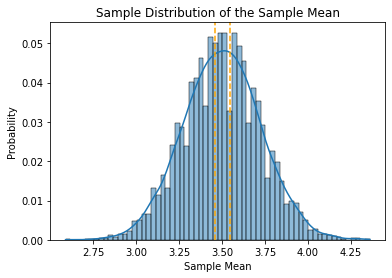

In [5]:
# for n = 100
histogram(X=X, n=100, P=P, n_trials=10000)

In [7]:
samples = histogram(X=X, n=100, P=P, n_trials=10000)

In [12]:
s_mean = samples.mean()
s_means = samples.mean(axis=1)
s_median = np.median(s_means)
s_std = s_means.std()
SE = s_std / np.sqrt(100)

In [9]:
samples.mean(axis=1)

array([3.51, 3.61, 3.57, ..., 3.36, 3.67, 3.33])

In [13]:
s_mean

3.50067

In [14]:
s_means

array([3.51, 3.61, 3.57, ..., 3.36, 3.67, 3.33])

In [15]:
s_median

3.5

In [16]:
s_std

0.22451577027015274

In [17]:
SE

0.022451577027015272

In [18]:
xmin, xmax = st.norm.interval(.95, loc=s_mean, scale=SE)
xmin, xmax

(3.4566657176309232, 3.5446742823690767)

In [19]:
st.norm.interval(.95, loc=s_mean, scale=SE)

(3.4566657176309232, 3.5446742823690767)

In [21]:
CL = .95
st.norm.ppf((1 - CL) / 2 + CL)

1.959963984540054

In [22]:
MOE = 1.96 * SE
MOE

0.04400509097294993